In [1]:
import numpy as np
import xarray as xr
from sklearn.metrics import mean_squared_error
import sys, os
sys.path.append("/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_PYTHON/src")
import READ_FILE
import NCL_FUNC

season = "ON"

# READ JRA55
tvar = "hgt"
tlev = 500
oz5003=READ_FILE.READ_JRA55(season,tvar,tlev)

tlev = 1000
oz10003 = READ_FILE.READ_JRA55(season,tvar,tlev)

tvar = "tmp2m"
ot2m3 = READ_FILE.READ_JRA55(season,tvar,tlev)

nyrs=oz5003['year'].size
owgt=NCL_FUNC.latRegWgt(oz5003['latitude'])
wgt=owgt[owgt['latitude']>=20]
wgt.name='weights'

# READ GloSea5
model0 = "GloSea5"
tvar = "hgt"
tlev = 500
mz5003_gc2 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tlev = 1000
mz10003_gc2 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tvar = "t15m"
mt2m3_gc2 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

# READ GloSea6
model0 = "GloSea6"
tvar = "hgt"
tlev = 500
mz5003_gc32 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tlev = 1000
mz10003_gc32 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

tvar = "t15m"
mt2m3_gc32 = READ_FILE.READ_GloSea5(season,tvar,tlev,model0)

/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199310.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199311.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199410.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199411.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199510.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199511.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199610.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199611.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199710.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199711.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199810.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.day.199811.nc
/data03/Glosea5/jhsim/NCL2PYTHON/METRIC_NCL//DATA/JRA55/hgt/hgt.

In [41]:
 t2m_rmse_gc2    = t2m3_rmse_gc2[t2m3_rmse_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
 t2m_rmse_gc32   = t2m3_rmse_gc32[t2m3_rmse_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
 z1000_rmse_gc2  = z10003_rmse_gc2[z10003_rmse_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
 z1000_rmse_gc32 = z10003_rmse_gc32[z10003_rmse_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
 z500_rmse_gc2   = z5003_rmse_gc2[z5003_rmse_gc2['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])
 z500_rmse_gc32  = z5003_rmse_gc32[z5003_rmse_gc32['latitude']>=20,:].weighted(wgt).mean(dim=["longitude","latitude"])

In [44]:
datalist=[mt2m3_gc2_cdiff, mt2m3_gc32_cdiff]

In [48]:
data=xr.concat(datalist,dim='model')

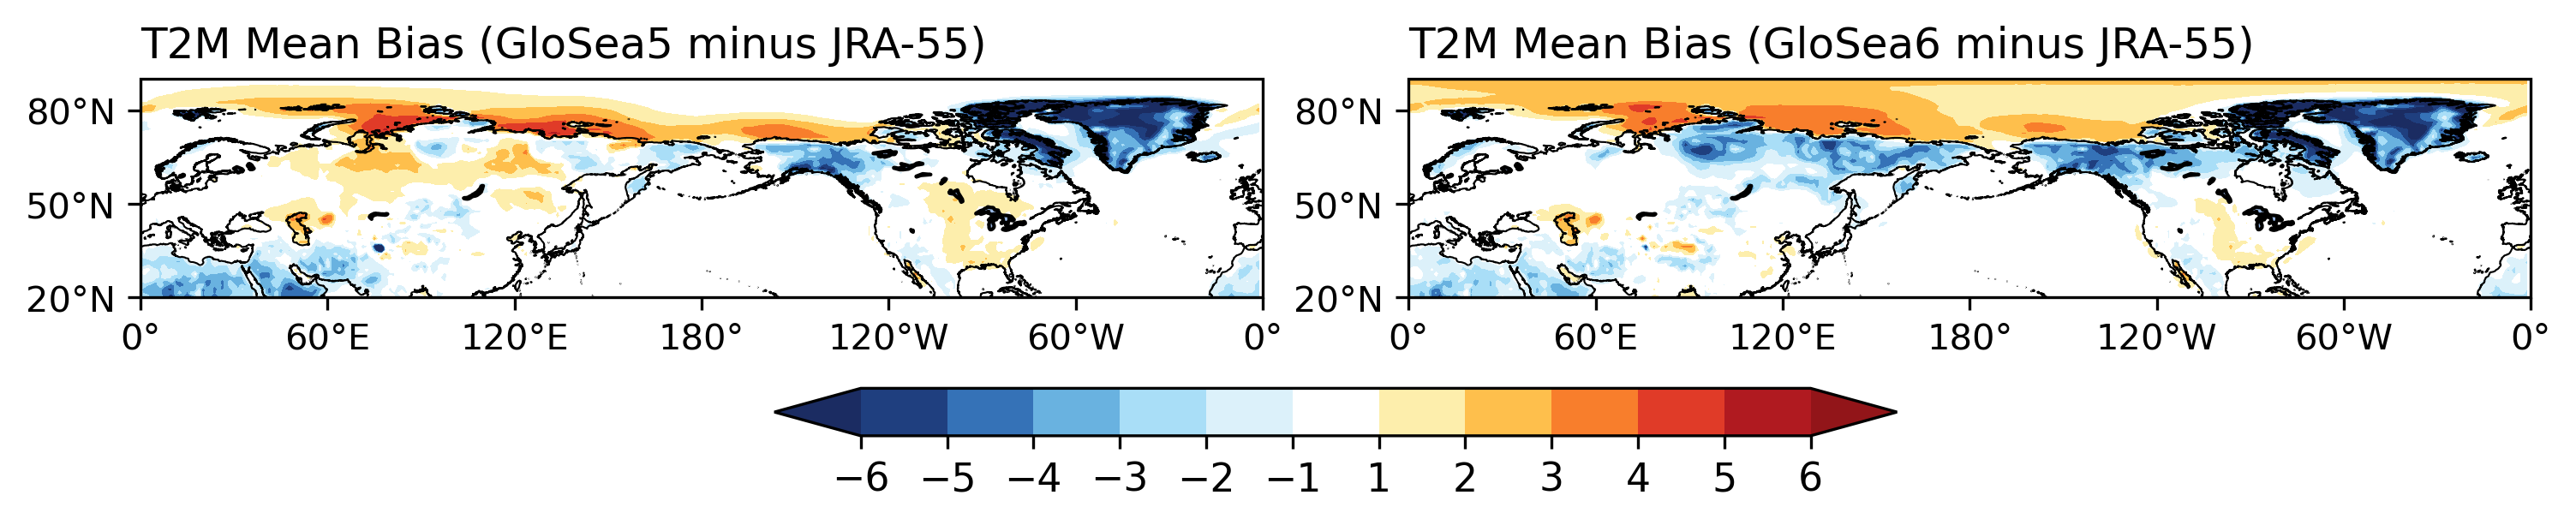

In [67]:
import cmaps
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geocat.viz as gv

model=["GloSea5","GloSea6"]

t2m=xr.concat(datalist,dim='model')

fig, axs = plt.subplots(1,
                        2,
                        subplot_kw={"projection": ccrs.PlateCarree(central_longitude=180)},
                        figsize=(12, 6),
                        dpi=300)

cmap=cmaps.BlueWhiteOrangeRed
min_lat=20
max_lat=90

v=v = np.linspace(-6, 6, 13)
v=v[v!=0]

for i in range(data.model.size):
    t2m=data[i]
    axs[i].coastlines(resolution='10m', color='black', linewidth=0.5)
    axs[i].add_feature(cfeature.LAKES, edgecolor='black')
    c = axs[i].contourf(
        t2m['longitude'].data,
        t2m['latitude'].data,
        t2m.data,
        levels=v,
        cmap=cmap,
        extend='both',
        transform=ccrs.PlateCarree()
        )
    title = f'T2M Mean Bias ({model[i]} minus JRA-55)'
    axs[i].set_title(title,loc='left',fontsize=12)

    gv.add_lat_lon_ticklabels(axs[i])

    gv.set_axes_limits_and_ticks(axs[i],
                                ylim=(min_lat, max_lat),
                                yticks=np.arange(min_lat, max_lat, 30),
                                xticks=np.arange(-180, 181, 60))
cbar = plt.colorbar(c,
                    ax=axs,
                    orientation='horizontal',
                    shrink=0.9,
                    pad=0.1,
                    fraction=.04,
                    location='bottom',
                    extendfrac='auto',
                    ticks=v)

cbar.ax.tick_params(labelsize=11)

plt.subplots_adjust(bottom=0.2, top=0.4, hspace=0, wspace=0.13)
plt.show()